# #KreditYuk - Final Project : Predict Potential Loaner

## Stage 1 - Exploratory Data Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [7]:
#Load dataset here
df_stg1 = pd.read_csv('C:/Users/ACER/Desktop/Rakamin/Final Project/Dataset Loan Prediction/Test Data.csv')
df_stg1_1 = pd.read_csv('C:/Users/ACER/Desktop/Rakamin/Final Project/Dataset Loan Prediction/Training Data.csv')
df_stg1_2 = pd.read_csv('C:/Users/ACER/Desktop/Rakamin/Final Project/Dataset Loan Prediction/Sample Prediction Dataset.csv')


In [8]:
df_stg1_1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


### 1. Descriptive Statistics

In [91]:
df_stg1_1.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [92]:
df_stg1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [95]:
nums= ['Id','Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']
cats = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']

In [96]:
df_stg1_1[nums].describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [97]:
df_stg1_1[nums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Id                 252000 non-null  int64
 1   Income             252000 non-null  int64
 2   Age                252000 non-null  int64
 3   Experience         252000 non-null  int64
 4   CURRENT_JOB_YRS    252000 non-null  int64
 5   CURRENT_HOUSE_YRS  252000 non-null  int64
 6   Risk_Flag          252000 non-null  int64
dtypes: int64(7)
memory usage: 13.5 MB


In [99]:
df_stg1_1[cats].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [100]:
df_stg1_1[cats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Married/Single   252000 non-null  object
 1   House_Ownership  252000 non-null  object
 2   Car_Ownership    252000 non-null  object
 3   Profession       252000 non-null  object
 4   CITY             252000 non-null  object
 5   STATE            252000 non-null  object
dtypes: object(6)
memory usage: 11.5+ MB


#### Dapat disimpulkan:

- A. Semua data sesuai
- B. Tidak ada kolom yang kosong
- C. Tidak di temukan keanehan pada masing-masing feature


### 2. Univariate Analysis

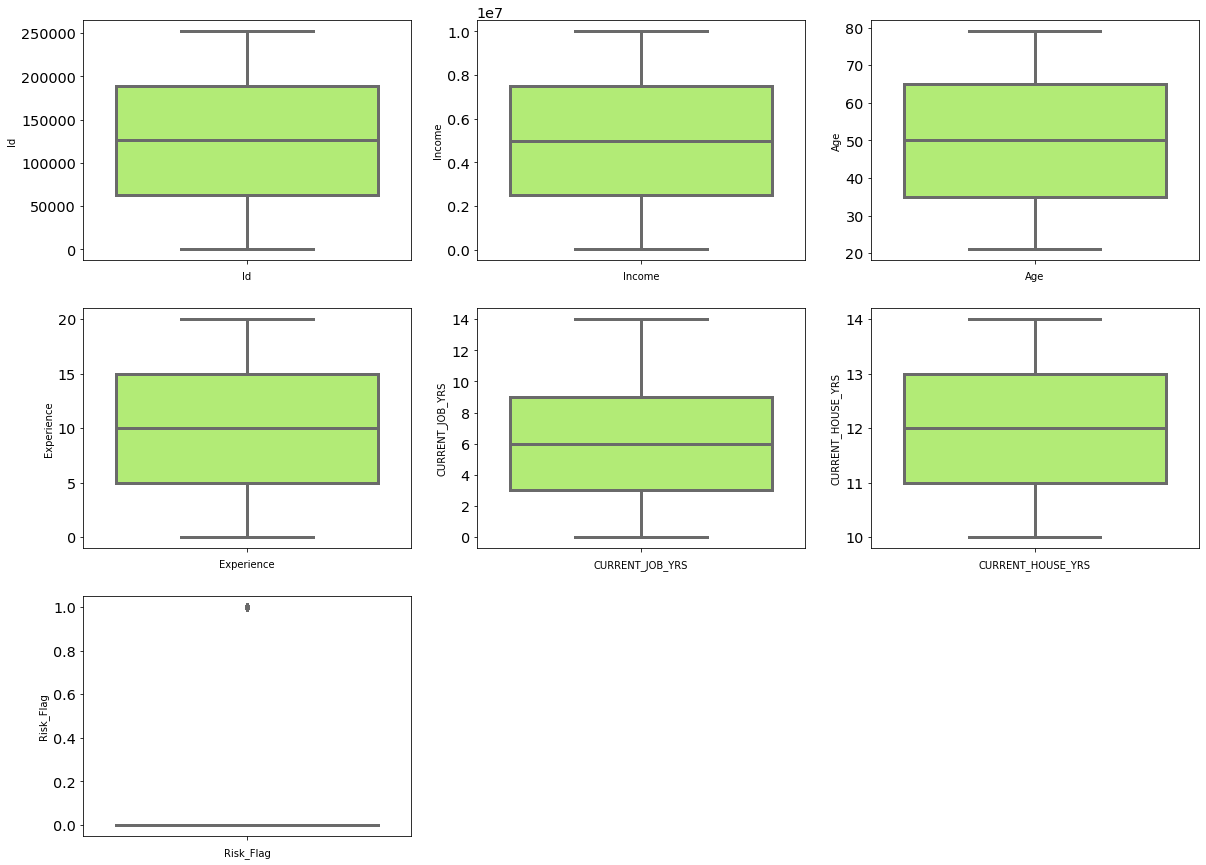

In [101]:
plt.figure(figsize=(20,15))

features = nums
for i in range(0, len(features)):
    plt.subplot(3,3, i+1)
    sns.boxplot(y=df_stg1_1[features[i]], color='#B2FF62', orient='v' )
    plt.xlabel(features[i], size=10)
    plt.ylabel(features[i], size=10)


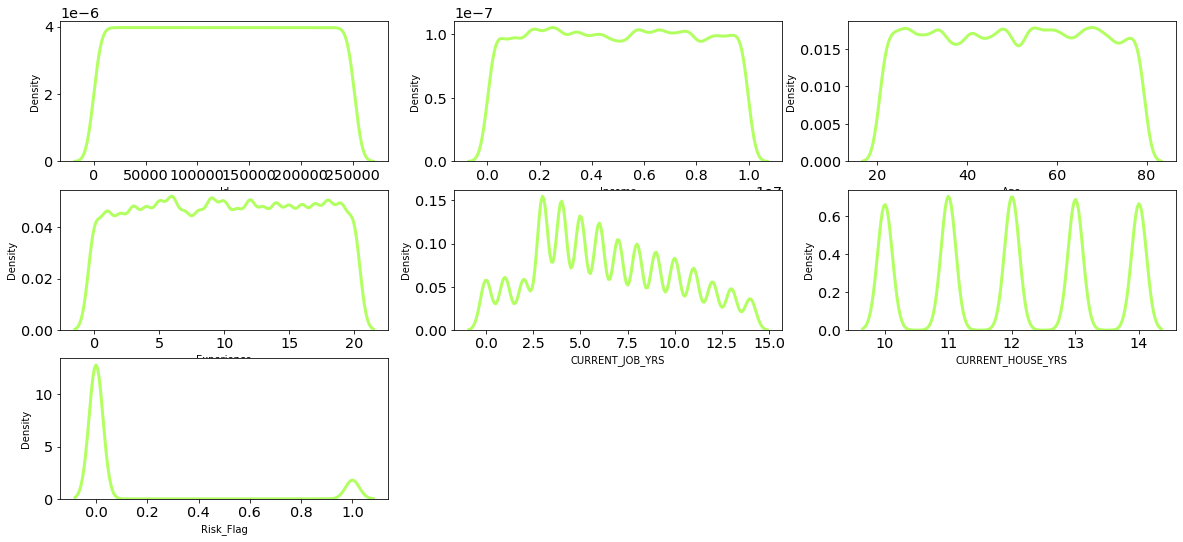

In [105]:
features = nums
plt.figure(figsize=(20,15))

for i in range(0,len(features)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x=df_stg1_1[features[i]], color='#B2FF62')
    plt.xlabel(features[i], size=10)

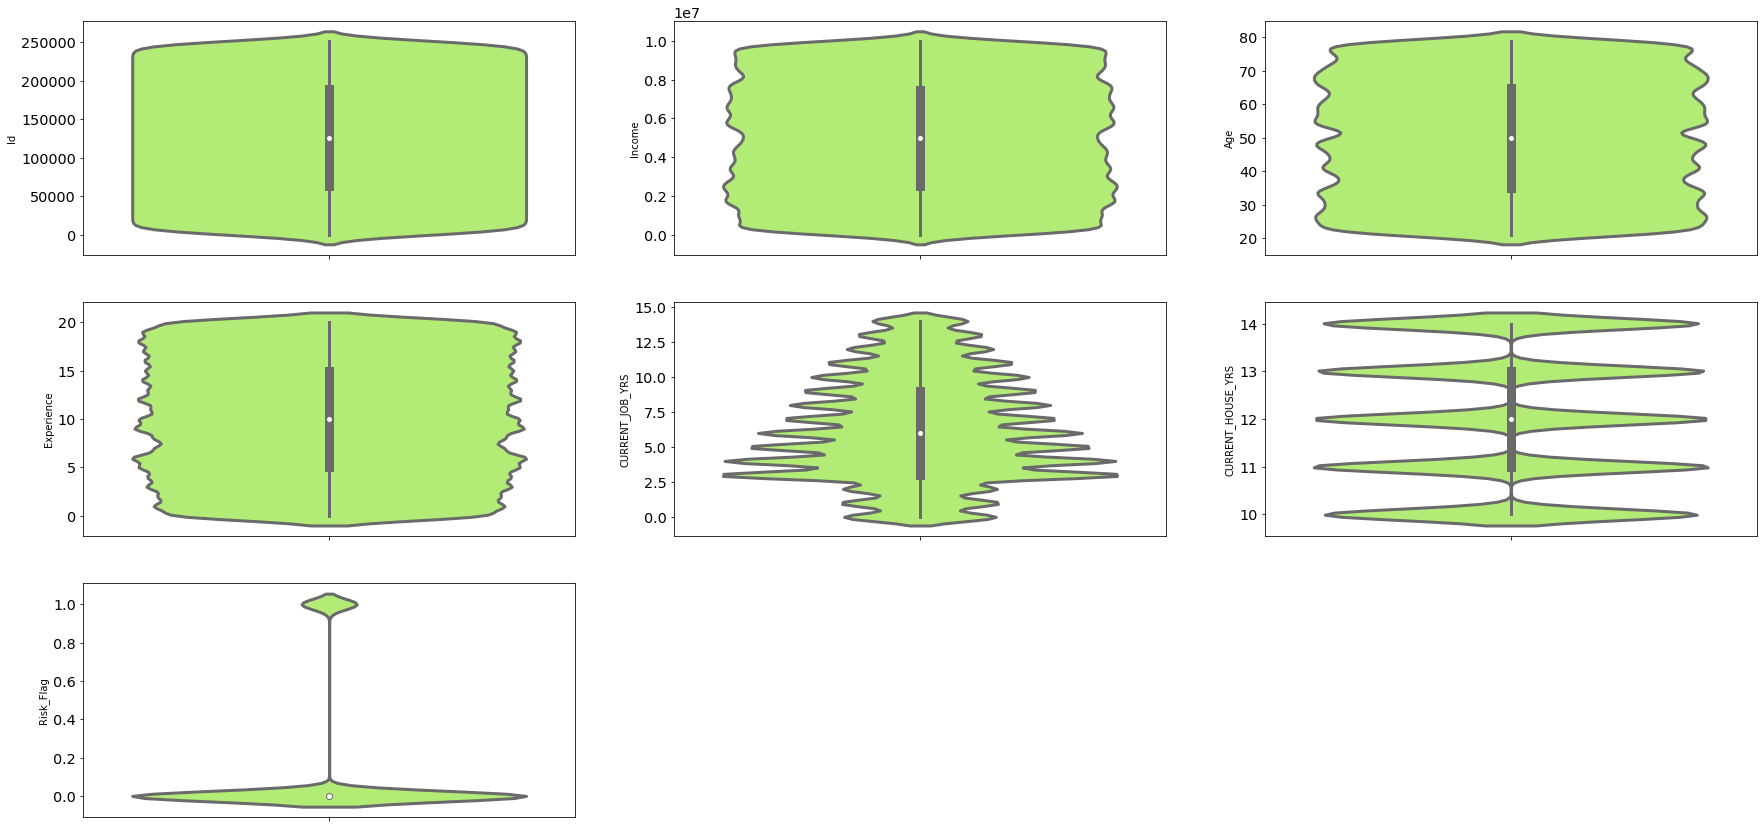

In [107]:
features = nums
plt.figure(figsize=(30,25))

for i in range(0,len(features)):
    plt.subplot(5,3, i+1)
    sns.violinplot(y=df_stg1_1[features[i]], color='#B2FF62',orient='v')


grafik yang menarik dari data numeric adalah :
1. current_job_yrs : sedikit right skewed, ada outlier disisi kanan
2. selebihnya banyak grafik yang lebih menjurus ke bimodal : income, age, experience, dan current_house_yrs
3. 


In [77]:
cats

['Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE']

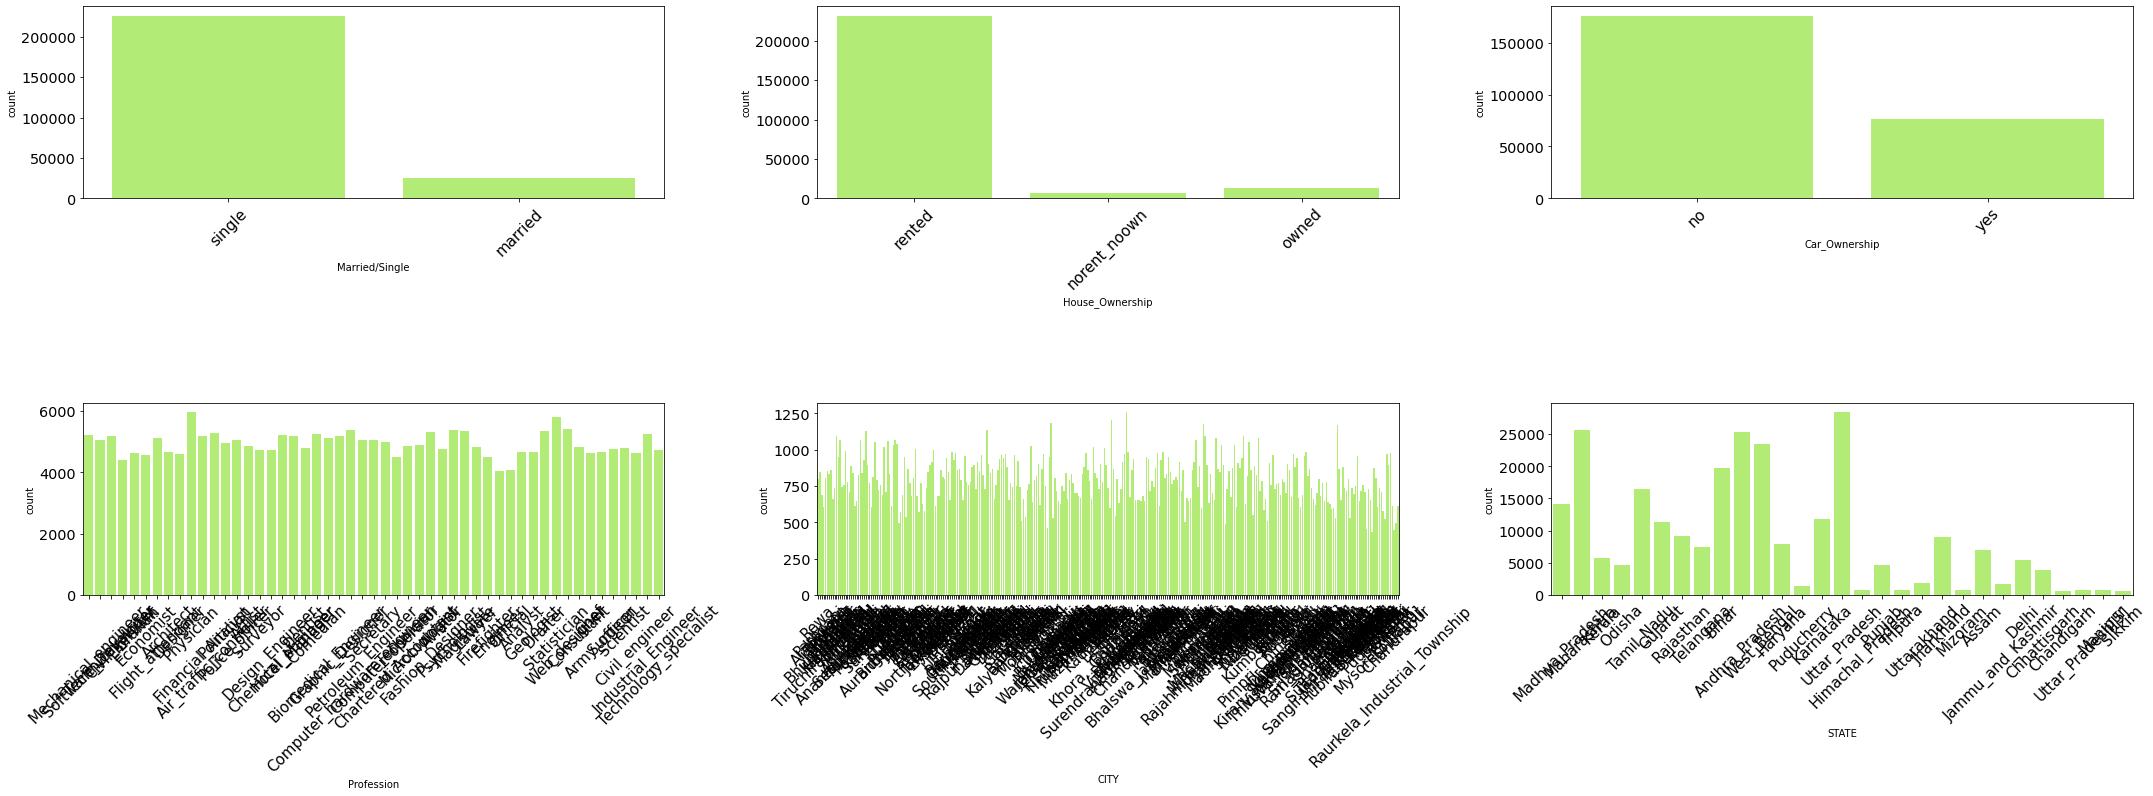

In [111]:
plt.figure(figsize=(30,25))

for i in range(0, len(cats)):
    plt.subplot(5,3, i+1)
    sns.countplot(x=df_stg1_1[cats[i]], color='#B2FF62', orient='v')
    plt.xticks(fontsize=15, rotation=45)
    plt.tight_layout()
    

1. pada feature Profession,City dan State memiliki terlalu banyak value maka perlu dilakukan feature engineering agar saat proses modeling bisa lebih mudah 
2. Ada feature yang mirip yaitu experience dan current job yrs serta house ownership dengan car ownership yang bisa kita pilih salah satunya saja 
3. tidak di temukan outlier namun perlu di perhatikan skala untuk umur dan gaji mungkin memerlukan feature engineering

### 3. Multivariate Analysis

In [109]:
df_stg1_1.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


Text(0.5, 1.0, 'korelasi')

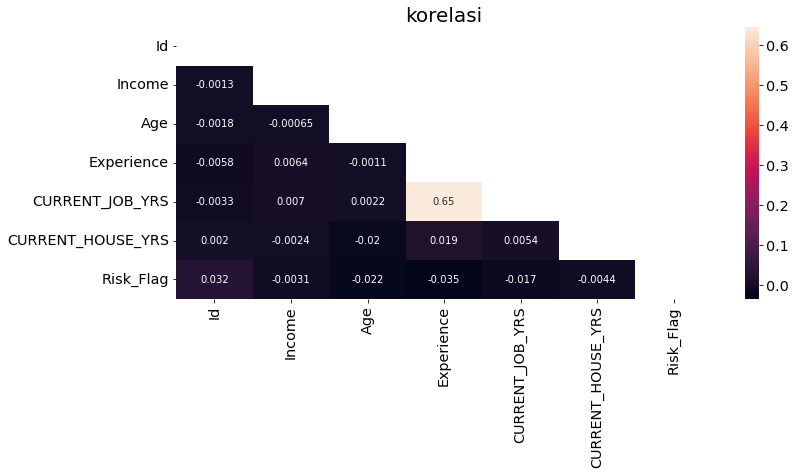

In [110]:
mask = np.triu(np.ones_like(df_stg1_1[nums].corr(), dtype=np.bool_))

plt.figure(figsize=(12,5))
heatmaps = sns.heatmap(df_stg1_1[nums].corr(), annot=True, mask=mask)
heatmaps.set_title('korelasi', fontdict={'fontsize':20}, pad=5)


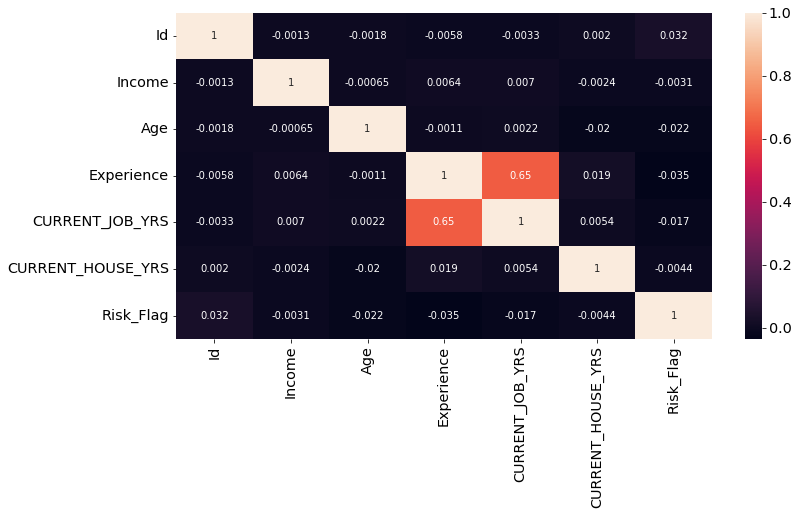

In [ ]:
sns.heatmap(df_stg.corr(), annot=True);

Dari correlation heatmap diatas, ada beberapa feature yang memilki korelasi cukup kuat dengan target (Risk_Flag) yaitu :

1. experience -0.035
2. age -0.022


### 4. Business Insight

In [117]:
df_stg1_1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [176]:
df_stg1_1['Age_Cats'] = pd.cut(df_stg1_1.Age,
                 [0, 20, 40, np.inf],
                 labels=['teen','young','adult'])
df_stg1_1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_Cats
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,young
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,young
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,adult
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,adult
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,adult


In [165]:
df_group = df_stg1_1.groupby(['Age_Cats','Risk_Flag']).agg({'Id':'count'}).reset_index()
df_group['ratio'] = df_group['Id'].apply(lambda x:round( x*100.0/(df_group['Id'].sum()),2))
df_group

,Age_Cats,Risk_Flag,Id,ratio
0,young,0,0,0.00
1,young,1,0,0.00
2,adult,0,73959,29.35
3,adult,1,11190,4.44
4,ederly,0,147045,58.35
5,ederly,1,19806,7.86


<AxesSubplot:xlabel='Age_Cats', ylabel='Id'>

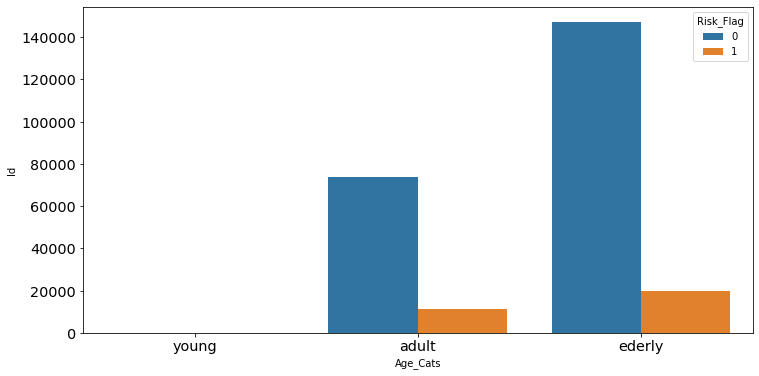

In [172]:
sns.barplot (x='Age_Cats', y ='Id',  hue='Risk_Flag', data = df_group)


In [175]:
#df_stg1_1.drop(columns='class of age',inplace=True)
df_stg1_1.drop(columns='age_class',inplace=True)

<b>Risk Flag by House Ownership<b>

In [ ]:
df_group1 = df_stg1_1.groupby(['House_Ownership','Risk_Flag']).agg({'Id':'count'}).reset_index()
df_group1['ratio'] = df_group1['Id'].apply(lambda x:round( x*100.0/(df_group1['Id'].sum()),2))
df_group1

,House_Ownership,Risk_Flag,Id,ratio
0,norent_noown,0,6469,2.57
1,norent_noown,1,715,0.28
2,owned,0,11758,4.67
3,owned,1,1160,0.46
4,rented,0,202777,80.47
5,rented,1,29121,11.56


<b>Risk Flag by Marital Status<b>

In [129]:
df_group2 = df_stg1_1.groupby(['Married/Single','Risk_Flag']).agg({'Id':'count'}).reset_index()
df_group2['ratio'] = df_group2['Id'].apply(lambda x:round( x*100.0/(df_group2['Id'].sum()),2))
df_group2

,Married/Single,Risk_Flag,Id,ratio
0,married,0,23092,9.16
1,married,1,2636,1.05
2,single,0,197912,78.54
3,single,1,28360,11.25


<AxesSubplot:xlabel='Married/Single', ylabel='Id'>

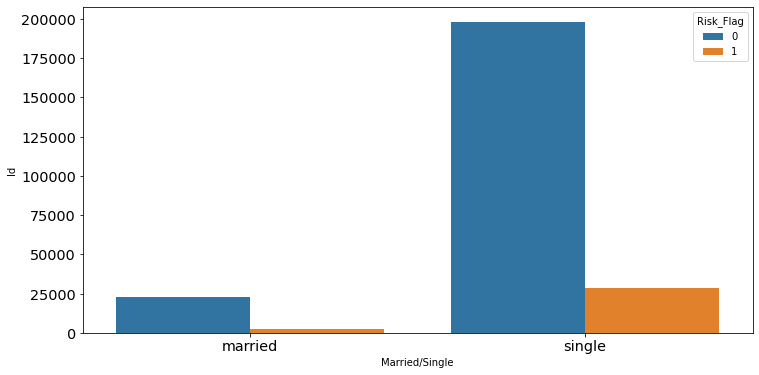

In [131]:
sns.barplot (x='Married/Single', y ='Id',  hue='Risk_Flag', data = df_group2)

<b>Risk Flag by CURRENT_JOB_YRS<b>

In [139]:
df_group3 = df_stg1_1.groupby(['CURRENT_JOB_YRS','Risk_Flag']).agg({'Id':'count'}).reset_index()
df_group3['ratio'] = df_group3['Id'].apply(lambda x:round( x*100.0/(df_group3['Id'].sum()),2))
df_group3.head()

,CURRENT_JOB_YRS,Risk_Flag,Id,ratio
0,0,0,9461,3.75
1,0,1,1582,0.63
2,1,0,9773,3.88
3,1,1,1802,0.72
4,2,0,9197,3.65


<AxesSubplot:xlabel='CURRENT_JOB_YRS', ylabel='Id'>

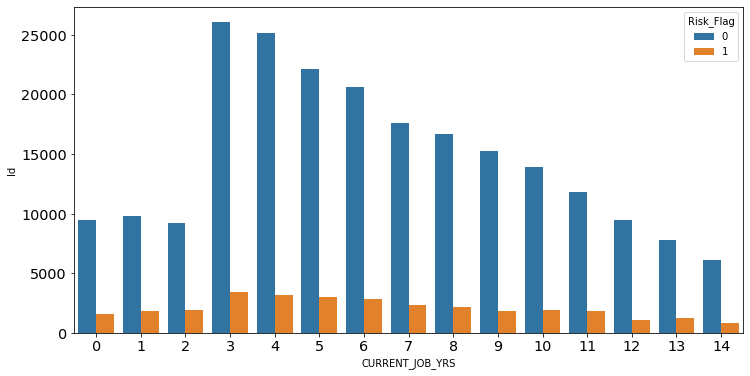

In [140]:
sns.barplot (x='CURRENT_JOB_YRS', y ='Id',  hue='Risk_Flag', data = df_group3)

<AxesSubplot:xlabel='count', ylabel='Profession'>

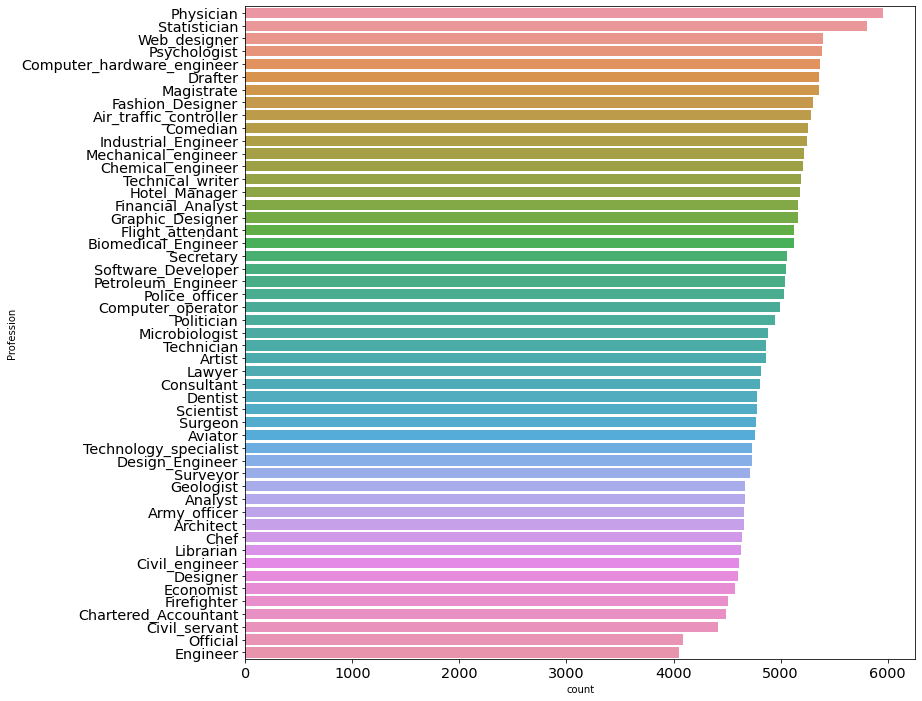

In [179]:
plt.figure(figsize=(12,12))
sns.countplot(data=df_stg1_1, y='Profession', order=df_stg1_1['Profession'].value_counts().index)

#### Summary Business Insight

In [ ]:
1. rata-rata calon peminjam yang di memiliki flag risk adalah 